<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/CNN/19_augmentation_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 증강 (Image Augmentation)
---
- tensorflow

In [3]:
!pip install tensorflow==2.11.0

In [4]:
import tensorflow as tf

print(tf.__version__)

2.9.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# !wget 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [7]:
# !tar -xvzf 'flower_photos.tgz'

In [8]:
import pathlib

data_dir = pathlib.Path('/content/flower_photos')
type(data_dir)

pathlib.PosixPath

In [9]:
fnames = list(data_dir.glob('*/*.jpg')) #glob로 하면 full path가 들어옴 - os는 파일이름만


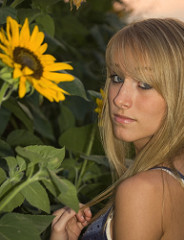

In [10]:
import PIL
import PIL.Image

PIL.Image.open(fnames[1])

## Dataset 객체

In [11]:
image_size = (180, 180)
batch_size = 32

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = image_size,
    validation_split = 0.2,
    subset = 'training',
    seed = 2022
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = image_size,
    validation_split = 0.2,
    subset = 'validation',
    seed = 2022
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [14]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3, 
                    activation='relu', input_shape = (180, 180, 3)),
      layers.MaxPool2D(2), 
      layers.Conv2D(filters = 3642, kernel_size = 3,
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(5, activation='softmax')
      
  ])

  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [ ]:
model = build_model()
log = model.fit(train_ds, epochs = 5, validation_data = val_ds, verbose = 1)

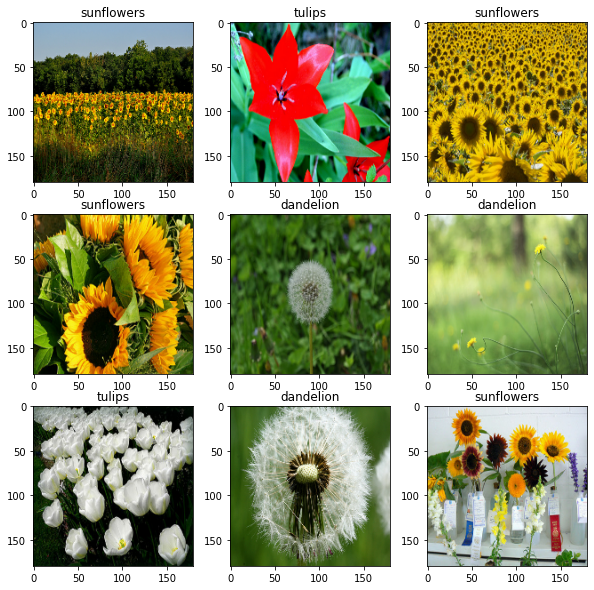

In [20]:

for images, labels in train_ds.take(1):
  plt.figure(figsize=(10,10))

  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(train_ds.class_names[labels[i]])

  plt.show()

## 성능을 위한 설정


In [23]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

## 이미지 증강

In [30]:
data_augmen = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomFlip('vertical'),
    layers.RandomRotation(0.5),
])

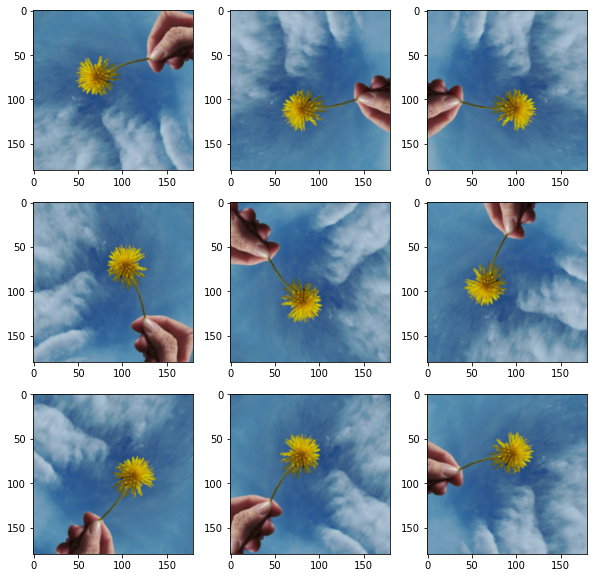

In [37]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmen(images)
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('int'))
  plt.show()

In [40]:
data_augmen = keras.Sequential([
    layers.Rescaling(1./255.),
    layers.Resizing(1180,180),
    layers.RandomFlip('horizontal'),
    layers.RandomFlip('vertical'),
    layers.RandomRotation(0.5),
])

train_ds = train_ds.map(
    lambda img, label: (data_augmen(img), label),
    num_parallel_calls = tf.data.AUTOTUNE
)

val_ds = val_ds.map(
    lambda img, label: (data_augmen(img), label),
    num_parallel_calls = tf.data.AUTOTUNE
)


## 모델

In [38]:
def build_model_2():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3, 
                    activation='relu', input_shape = (180, 180, 3)),
      layers.MaxPool2D(2), 
      layers.Conv2D(filters = 3642, kernel_size = 3,
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(5, activation='softmax')
      
  ])

  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [ ]:
model = build_model_2()
model.summary()

In [ ]:
EPOCHS = 10

log = model.fit(train_ds, epochs = EPOCHS, validation_data = val_ds, verbose = 1)